<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/main/notebooks/Python_chapter_ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最適化理論と種々の最適化手法

この章では、最適化理論と種々の最適化手法について学ぶ。

## 勾配降下法

勾配降下法とは、目的関数を微分した勾配の値のみを使ってパラメータを更新する方法です。  
たとえば,重み$W$の$i$番目を更新する際には  
$W_i := W_i - \eta \frac{\partial f}{\partial W_i}$  
とします。($f$は目的関数で、$\eta$は学習率(パラメータ更新のスケールを決めるパラメータ)です。)

## Adam

Adamは、勾配降下法の様にその都度の勾配の情報だけを使うのではなく、
以前の勾配の情報も有効活用する手法です。

Adamは2014年に提唱された比較的新しい手法で、以降の機械学習の論文では、Adamが最もよく使われています。(*最も"良い"という意味では必ずしもありません)

## 勾配消失問題

ニューラルネットワークの学習がうまく進むかどうかは一般に
1. ネットワークの構造(アーキテクチャとも言ったりします)や活性化関数(とその微分)の持つ性質
2. 最適化手法や手法内のパラメータ
3. 重みやバイアスの初期値

などに強く依存します。

1.に関して   
回帰問題における代表的な活性化関数としては
最近の傾向として、sigmoidよりも以下のReLU関数が使われることが多いです。  






In [157]:
def relu(z):
    return (z > 0)* z   

def relu_der(z):
     return (z > 0)*1.0 
     
#いずれも、zが実数値でもnp.array型のベクトルでも対応可能な表式

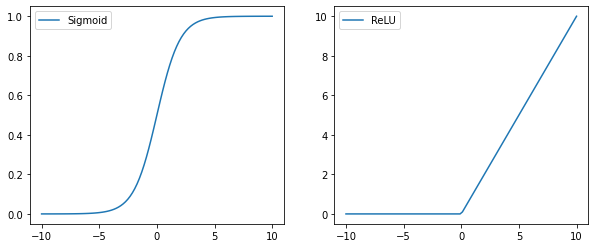

In [158]:
##適当な区間のxの値を用意する
xp = np.linspace(-10.0,10.0,100)
yp_sigmoid = sigmoid(xp)
yp_relu = relu(xp)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.plot(xp,yp_sigmoid,label="Sigmoid")
ax1.legend()
ax2 = fig.add_subplot(122)
ax2.plot(xp,yp_relu,label="ReLU")
ax2.legend()
plt.show()
plt.close()

sigmoid関数はx->+∞で1.0, x=-∞で-1.0に漸近します。

一方でReLU関数はx=0までは0.0で、x>0.0で、xとなるような関数です。


なぜReLUがよく使われる様になったかと言うと、  
(特に隠れ層の数が多い深層学習において)学習するにつれて勾配の値が小さくなって学習が進まない、
という問題を解決するためです。

それぞれの関数の微分を表示してみると

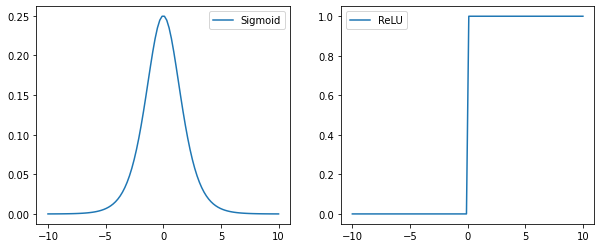

In [159]:
xp = np.linspace(-10.0,10.0,100)
yp_sigmoid = sigmoid_der(xp)
yp_relu = relu_der(xp)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.plot(xp,yp_sigmoid,label="Sigmoid")
ax1.legend()
ax2 = fig.add_subplot(122)
ax2.plot(xp,yp_relu,label="ReLU")
ax2.legend()
plt.show()
plt.close()

sigmoid関数は微分の値が最大で0.25なのに対して、ReLU関数では最大1.0となるため勾配の消失が起こりにくいのです。

問題ごとに何が最適なネットワーク構造だったり活性化関数なのかは、  
予め分かることはなく、試行錯誤が必要です。  
ここまでこの授業で勉強してきた皆さんは既に、  
「この試行錯誤自体を人力ではなくコンピュータにやらせる方法はないか」という点に思い至るのではないでしょうか?

これに関連したお話はベイズ最適化の回で説明します。

3.に関して

また、ネットワークの重みやバイアスをどのような値から始めるかに学習が依存する場合もあります。

というのも、今考えた３層のニューラルネットワークでは、  
重み$W$の学習に使う勾配の表式は、$V$に比例しています。

したがって単純に勾配の情報のみを使う最適化手法では、  
$V$の初期値を0に取ったり、学習の過程で偶然$V$の値が0に近くなってしまうと、  
$V$が更新されノンゼロの値を持つまで$W$の学習は始まりません。

どのような初期値を採用するべきかに関しても、予め知ることは一般にはできませんが、  
いくつかの特定の場合に関して、推奨される方法というのは存在しています。

例: ReLU関数を活性化関数に使うときはHeの初期値というものが推奨されている